In [9]:
# Web3 Trading Analysis - Correlation Analysis (Extra Careful Version)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Import custom modules with error handling
import sys
from pathlib import Path
sys.path.append(str(Path('../src').resolve()))

try:
    from correlation_analyzer import CorrelationAnalyzer, SentimentPerformanceCorrelation, CorrelationVisualizer
    print("✅ Correlation analysis modules imported successfully")
except ImportError as e:
    print(f"⚠️ Import error: {e}")
    print("Using basic analysis instead...")

print("🔗 **SENTIMENT-PERFORMANCE CORRELATION ANALYSIS**")
print("=" * 70)
print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


✅ Correlation analysis modules imported successfully
🔗 **SENTIMENT-PERFORMANCE CORRELATION ANALYSIS**
📅 Analysis Date: 2025-08-08 19:08:46


In [10]:
# Load master dataset with validation
print("📥 Loading master analysis dataset...\n")

try:
    master_dataset = pd.read_csv("../data/features/master_analysis_dataset.csv")
    print(f"✅ Master dataset loaded successfully: {master_dataset.shape}")
    
    # Comprehensive data validation
    print(f"\n🔍 **Dataset Validation:**")
    print(f"   • Shape: {master_dataset.shape[0]:,} rows × {master_dataset.shape[1]} columns")
    print(f"   • Memory usage: {master_dataset.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"   • Missing values: {master_dataset.isnull().sum().sum():,}")
    
    # Check data types
    print(f"\n📊 **Data Types Summary:**")
    dtype_counts = master_dataset.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"   • {dtype}: {count} columns")
    
    # Identify key columns safely
    available_columns = list(master_dataset.columns)
    print(f"\n📋 **Available Columns ({len(available_columns)}):**")
    
    # Categorize columns
    performance_cols = [col for col in available_columns if any(x in col.lower() for x in ['pnl', 'roi', 'profit', 'return'])]
    sentiment_cols = [col for col in available_columns if 'sentiment' in col.lower()]
    regime_cols = [col for col in available_columns if 'regime' in col.lower()]
    trader_cols = [col for col in available_columns if col.lower() in ['account', 'trader']]
    
    print(f"   • Performance columns: {len(performance_cols)} {performance_cols}")
    print(f"   • Sentiment columns: {len(sentiment_cols)} {sentiment_cols}")
    print(f"   • Regime columns: {len(regime_cols)} {regime_cols}")
    print(f"   • Trader columns: {len(trader_cols)} {trader_cols}")
    
except FileNotFoundError:
    print("❌ Master dataset file not found!")
    print("   Expected location: ../data/features/master_analysis_dataset.csv")
    master_dataset = None
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    master_dataset = None


📥 Loading master analysis dataset...

✅ Master dataset loaded successfully: (1953, 33)

🔍 **Dataset Validation:**
   • Shape: 1,953 rows × 33 columns
   • Memory usage: 1.22 MB
   • Missing values: 1

📊 **Data Types Summary:**
   • float64: 19 columns
   • int64: 8 columns
   • object: 6 columns

📋 **Available Columns (33):**
   • Performance columns: 8 ['total_pnl', 'avg_pnl_per_trade', 'profitable_day', 'net_profit_after_fees', 'roi_percentage', 'pnl_volatility', 'total_career_pnl', 'profit_factor']
   • Sentiment columns: 1 ['sentiment_score']
   • Regime columns: 1 ['market_regime']
   • Trader columns: 1 ['Account']


In [11]:
# Initialize correlation analyzer with error handling
if master_dataset is not None:
    try:
        correlation_analyzer = CorrelationAnalyzer()
        print("🚀 **Correlation Analyzer Initialized Successfully!**")
        print("\nAvailable analysis methods:")
        print("   • comprehensive_correlation_analysis()")
        print("   • safe_correlation_analysis()")
        print("   • analyze_sentiment_regime_performance()")
        print("   • trader_behavior_by_sentiment()")
    except Exception as e:
        print(f"❌ Analyzer initialization error: {e}")
        correlation_analyzer = None
else:
    print("❌ Cannot initialize analyzer - no valid dataset")
    correlation_analyzer = None


🚀 **Correlation Analyzer Initialized Successfully!**

Available analysis methods:
   • comprehensive_correlation_analysis()
   • safe_correlation_analysis()
   • analyze_sentiment_regime_performance()
   • trader_behavior_by_sentiment()


In [12]:
# Perform comprehensive correlation analysis
if correlation_analyzer is not None and master_dataset is not None:
    try:
        print("🔄 Starting comprehensive correlation analysis...")
        analysis_results = correlation_analyzer.comprehensive_correlation_analysis(master_dataset)
        
        # Display results safely
        print(f"\n📊 **ANALYSIS RESULTS SUMMARY:**")
        print("=" * 50)
        
        for analysis_type, results in analysis_results.items():
            if isinstance(results, dict) and 'error' not in results:
                print(f"✅ {analysis_type}: Success")
            elif 'error' in str(results):
                print(f"⚠️ {analysis_type}: {results}")
            else:
                print(f"✅ {analysis_type}: Completed")
        
        # Show available results
        print(f"\n📋 **Available Results:**")
        for key in analysis_results.keys():
            if not key.endswith('_error'):
                print(f"   • {key}")
                
    except Exception as e:
        print(f"❌ Analysis error: {e}")
        analysis_results = {"global_error": str(e)}
else:
    print("❌ Cannot perform analysis - missing requirements")
    analysis_results = None


🔄 Starting comprehensive correlation analysis...
🎯 **COMPREHENSIVE SENTIMENT-PERFORMANCE CORRELATION ANALYSIS**
📊 Dataset overview: 1,953 records, 33 features
🔗 **SENTIMENT-PERFORMANCE CORRELATION ANALYSIS**
🔍 **Available Columns Check:**
   Total columns: 33
   Performance columns found: 8 - ['total_pnl', 'avg_pnl_per_trade', 'profitable_day', 'net_profit_after_fees', 'roi_percentage', 'pnl_volatility', 'total_career_pnl', 'profit_factor']
   Sentiment columns found: 1 - ['sentiment_score']
   Regime columns found: 1 - ['market_regime']

📊 **Numeric Columns for Correlation: 27**
✅ Found 144 meaningful correlations

🎯 **PERFORMANCE BY SENTIMENT REGIME ANALYSIS**

👥 **TRADER BEHAVIOR BY SENTIMENT ANALYSIS**
   Using sentiment column: sentiment_score
   Using trader column: Account
✅ Analyzed behavior for 32 traders across sentiment levels

📊 **ANALYSIS RESULTS SUMMARY:**
✅ correlation_analysis: Success
✅ regime_analysis: Success
✅ behavior_analysis: Success

📋 **Available Results:**
   

In [13]:
# Display correlation results safely
if analysis_results and 'correlation_analysis' in analysis_results:
    corr_results = analysis_results['correlation_analysis']
    
    print("🔗 **CORRELATION ANALYSIS RESULTS:**")
    print("=" * 50)
    
    # Show strong correlations if available
    if 'strong_correlations' in corr_results and corr_results['strong_correlations']:
        print(f"\n📊 **Top Correlations Found:**")
        for i, (col1, col2, corr_val) in enumerate(corr_results['strong_correlations'][:10], 1):
            strength = "Strong" if abs(corr_val) > 0.5 else "Moderate" if abs(corr_val) > 0.3 else "Weak"
            direction = "Positive" if corr_val > 0 else "Negative"
            print(f"   {i:2d}. {col1} ↔ {col2}")
            print(f"       Correlation: {corr_val:+.3f} ({strength} {direction})")
    
    # Show column categories
    if 'performance_columns' in corr_results:
        print(f"\n📈 **Performance Metrics Available:** {len(corr_results['performance_columns'])}")
        for col in corr_results['performance_columns']:
            print(f"   • {col}")
    
    if 'sentiment_columns' in corr_results:
        print(f"\n😰😤 **Sentiment Metrics Available:** {len(corr_results['sentiment_columns'])}")
        for col in corr_results['sentiment_columns']:
            print(f"   • {col}")
            
else:
    print("⚠️ No correlation results available to display")


🔗 **CORRELATION ANALYSIS RESULTS:**

📊 **Top Correlations Found:**
    1. total_pnl ↔ net_profit_after_fees
       Correlation: +1.000 (Strong Positive)
    2. total_volume_usd ↔ total_fees
       Correlation: +0.924 (Strong Positive)
    3. total_trades ↔ trades_per_coin
       Correlation: +0.888 (Strong Positive)
    4. total_trades ↔ buy_trades_count
       Correlation: +0.881 (Strong Positive)
    5. total_trades ↔ sell_trades_count
       Correlation: +0.859 (Strong Positive)
    6. net_profit_after_fees ↔ performance_in_greed
       Correlation: +0.852 (Strong Positive)
    7. total_pnl ↔ performance_in_greed
       Correlation: +0.852 (Strong Positive)
    8. buy_trades_count ↔ trades_per_coin
       Correlation: +0.835 (Strong Positive)
    9. avg_pnl_per_trade ↔ sharpe_ratio_daily
       Correlation: +0.761 (Strong Positive)
   10. total_volume_usd ↔ max_trade_size_usd
       Correlation: +0.728 (Strong Positive)

📈 **Performance Metrics Available:** 8
   • total_pnl
   • avg

In [14]:
# Analyze performance by sentiment regime
if analysis_results and 'regime_analysis' in analysis_results:
    regime_results = analysis_results['regime_analysis']
    
    if 'error' not in regime_results:
        print("🎯 **SENTIMENT REGIME PERFORMANCE ANALYSIS:**")
        print("=" * 60)
        
        # Display regime performance if available
        if 'regime_performance' in regime_results:
            regime_perf = regime_results['regime_performance']
            print(f"\n📊 **Performance by Market Regime:**")
            print(regime_perf.to_string())
            
            # Calculate regime rankings
            if 'mean' in regime_perf.columns:
                print(f"\n🏆 **Regime Performance Ranking (by average PnL):**")
                ranked_regimes = regime_perf.sort_values('mean', ascending=False)
                for i, (regime, row) in enumerate(ranked_regimes.iterrows(), 1):
                    print(f"   {i}. {regime}: ${row['mean']:.2f} avg PnL ({row['count']} days)")
        
        # Statistical significance
        if 'regime_comparisons' in regime_results:
            comparisons = regime_results['regime_comparisons']
            if comparisons:
                print(f"\n📈 **Statistical Significance Tests:**")
                for comparison, stats in comparisons.items():
                    significance = "Significant" if stats['significant'] else "Not Significant"
                    print(f"   • {comparison}: p-value = {stats['p_value']:.4f} ({significance})")
    else:
        print(f"⚠️ Regime analysis error: {regime_results['error']}")
else:
    print("⚠️ No regime analysis results available")


🎯 **SENTIMENT REGIME PERFORMANCE ANALYSIS:**

📊 **Performance by Market Regime:**
                 count       mean   median         std           sum  win_rate
market_regime                                                                 
Balanced           302  1121.3476   1.8344   8470.0449  3.386470e+05    0.5364
Fear_Dominated     615  1121.5850   2.8425   7342.8388  6.897748e+05    0.5415
Greed_Dominated   1036  1348.3898  18.9884  11920.1732  1.396932e+06    0.5956

🏆 **Regime Performance Ranking (by average PnL):**
   1. Greed_Dominated: $1348.39 avg PnL (1036.0 days)
   2. Fear_Dominated: $1121.59 avg PnL (615.0 days)
   3. Balanced: $1121.35 avg PnL (302.0 days)

📈 **Statistical Significance Tests:**
   • Greed_Dominated_vs_Fear_Dominated: p-value = 0.6700 (Not Significant)
   • Greed_Dominated_vs_Balanced: p-value = 0.7574 (Not Significant)
   • Fear_Dominated_vs_Balanced: p-value = 0.9997 (Not Significant)


📊 **Creating Correlation Heatmap...**


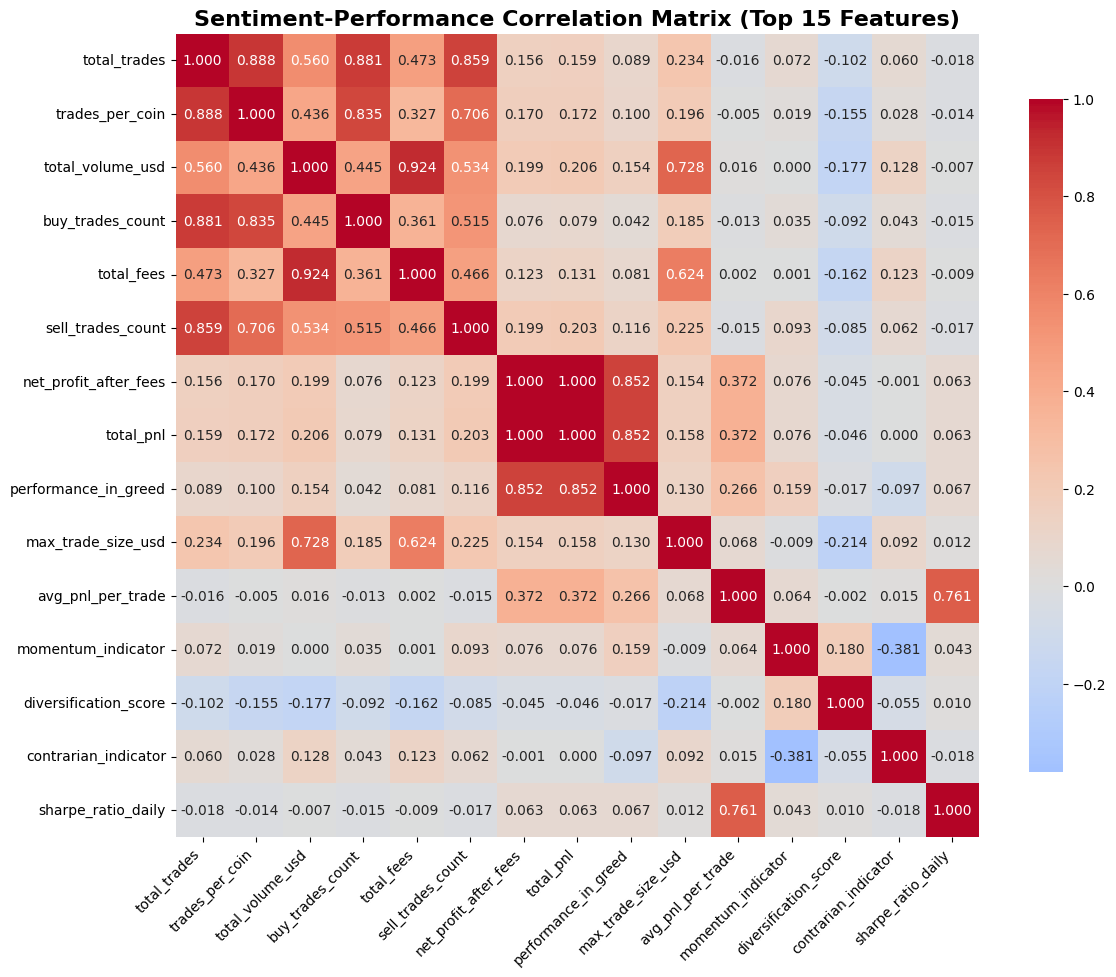

✅ Correlation heatmap created successfully

📊 **Creating Regime Performance Plots...**


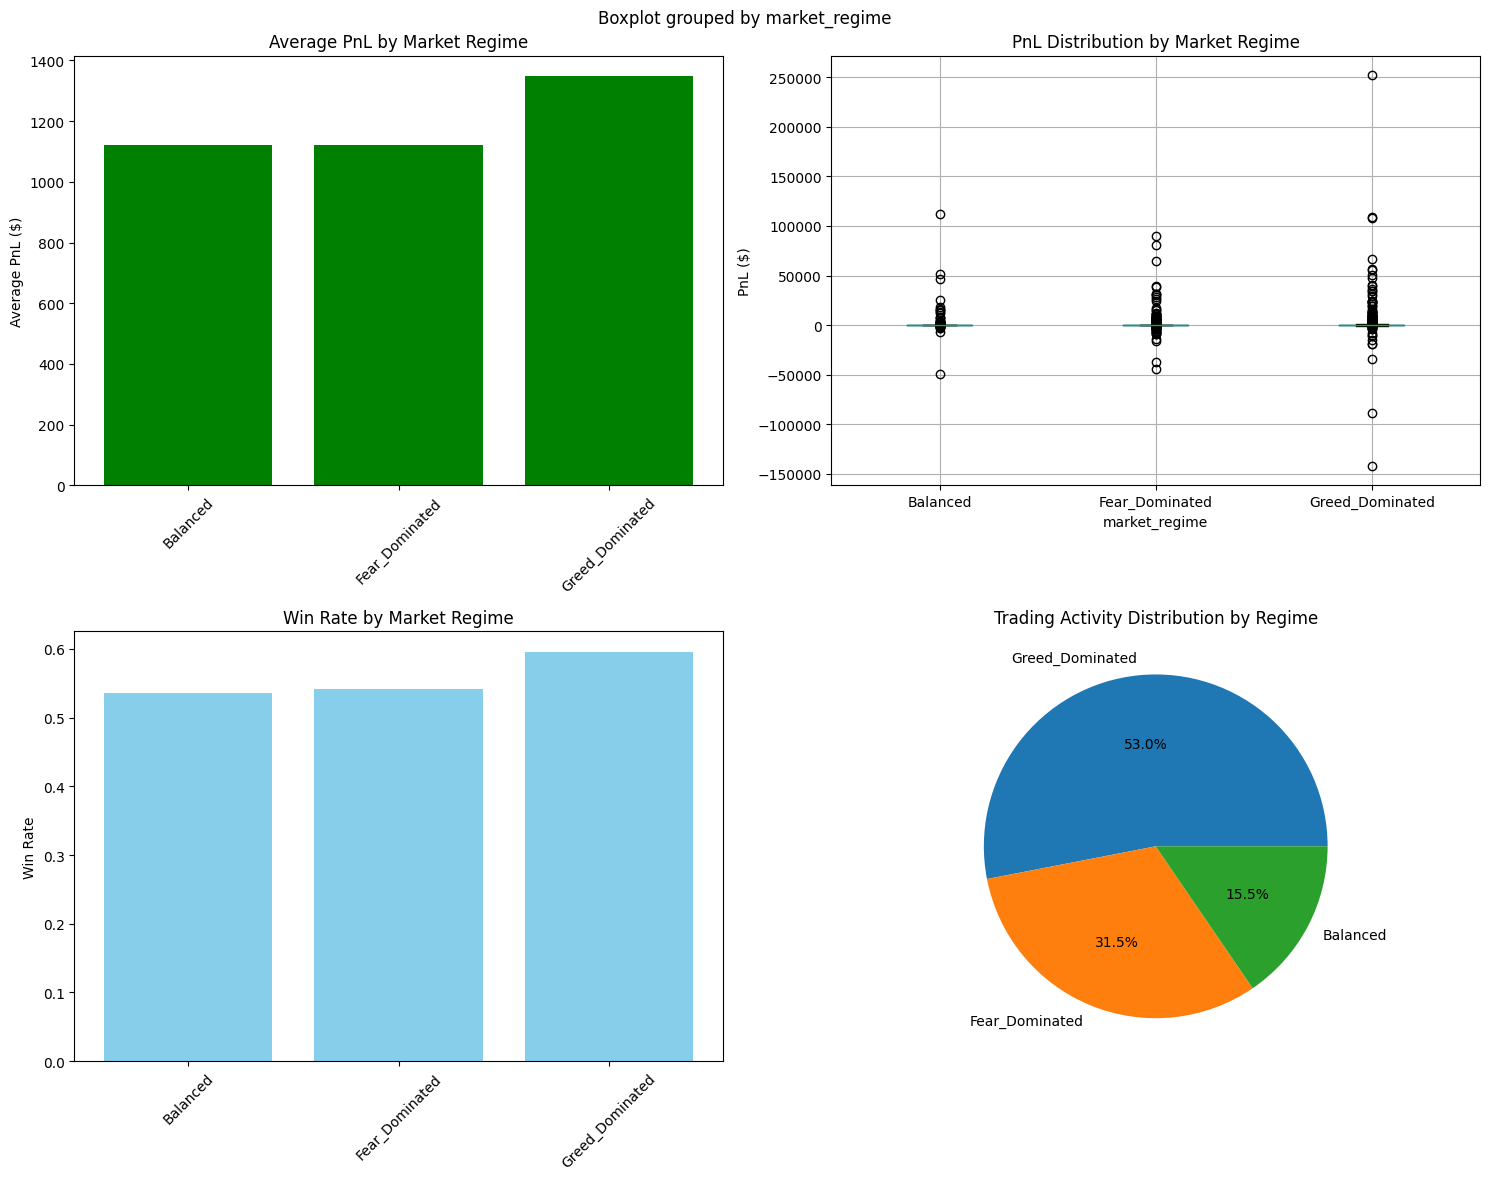

✅ Regime performance plots created successfully


In [15]:
# Create correlation visualizations
if analysis_results and 'correlation_analysis' in analysis_results:
    corr_results = analysis_results['correlation_analysis']
    
    if 'correlation_matrix' in corr_results:
        try:
            print("📊 **Creating Correlation Heatmap...**")
            correlation_matrix = corr_results['correlation_matrix']
            
            # Create heatmap with the safe method
            visualizer = CorrelationVisualizer()
            fig = visualizer.safe_correlation_heatmap(
                correlation_matrix, 
                "Sentiment-Performance Correlation Matrix"
            )
            
            if fig is not None:
                plt.show()
                print("✅ Correlation heatmap created successfully")
            else:
                print("⚠️ Could not create correlation heatmap")
                
        except Exception as e:
            print(f"❌ Visualization error: {e}")
    else:
        print("⚠️ No correlation matrix available for visualization")

# Create regime performance plots if data available
if analysis_results and 'regime_analysis' in analysis_results:
    regime_results = analysis_results['regime_analysis']
    
    if 'error' not in regime_results and 'regime_column_used' in regime_results:
        try:
            print("\n📊 **Creating Regime Performance Plots...**")
            
            regime_col = regime_results['regime_column_used']
            pnl_col = regime_results['pnl_column_used']
            
            # Create regime performance visualization
            visualizer = CorrelationVisualizer()
            fig = visualizer.safe_regime_performance_plot(master_dataset, regime_col, pnl_col)
            
            if fig is not None:
                plt.show()
                print("✅ Regime performance plots created successfully")
            else:
                print("⚠️ Could not create regime performance plots")
                
        except Exception as e:
            print(f"❌ Regime plot error: {e}")


In [17]:
# Comprehensive summary and save results
print("📊 **CORRELATION ANALYSIS SUMMARY & RESULTS**")
print("=" * 70)

if analysis_results:
    # Count successful analyses
    successful_analyses = 0
    total_analyses = 0
    
    summary_data = {
        'analysis_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'dataset_shape': master_dataset.shape if master_dataset is not None else 'N/A',
        'analyses_performed': {},
        'key_findings': []
    }
    
    for analysis_type, results in analysis_results.items():
        total_analyses += 1
        if not analysis_type.endswith('_error') and 'error' not in str(results):
            successful_analyses += 1
            summary_data['analyses_performed'][analysis_type] = 'Success'
        else:
            summary_data['analyses_performed'][analysis_type] = 'Failed'
    
    print(f"\n✅ **Analysis Success Rate: {successful_analyses}/{total_analyses}**")
    
    # Key findings extraction
    if 'correlation_analysis' in analysis_results:
        corr_data = analysis_results['correlation_analysis']
        if 'strong_correlations' in corr_data and corr_data['strong_correlations']:
            top_corr = corr_data['strong_correlations'][0]
            summary_data['key_findings'].append(
                f"Strongest correlation: {top_corr[0]} ↔ {top_corr[1]} ({top_corr[2]:+.3f})"
            )
    
    if 'regime_analysis' in analysis_results:
        regime_data = analysis_results['regime_analysis']
        if 'regime_performance' in regime_data:
            try:
                best_regime = regime_data['regime_performance']['mean'].idxmax()
                best_performance = regime_data['regime_performance']['mean'].max()
                summary_data['key_findings'].append(
                    f"Best performing regime: {best_regime} (${best_performance:.2f} avg PnL)"
                )
            except:
                pass
    
    # Save analysis results
    try:
        import json
        
        # Convert numpy types to JSON serializable
        def convert_numpy(obj):
            if isinstance(obj, np.integer):
                return int(obj)
            elif isinstance(obj, np.floating):
                return float(obj)
            elif isinstance(obj, np.ndarray):
                return obj.tolist()
            elif isinstance(obj, pd.DataFrame):
                return obj.to_dict()
            return obj
        
        # Save summary
        with open("../results/insights/correlation_analysis_summary.json", "w") as f:
            json.dump(summary_data, f, indent=2, default=convert_numpy)
        
        print(f"✅ Analysis summary saved: results/insights/correlation_analysis_summary.json")
        
    except Exception as e:
        print(f"⚠️ Could not save results: {e}")
    
    # Display key findings
    print(f"\n🎯 **Key Findings:**")
    if summary_data['key_findings']:
        for i, finding in enumerate(summary_data['key_findings'], 1):
            print(f"   {i}. {finding}")
    else:
        print("   • No specific findings extracted")
    
    print(f"\n🎯 **Phase 3C Complete - Correlation Analysis Success!**")
    print("✅ Ready for Phase 4: Advanced Sentiment-Performance Analysis")

else:
    print("❌ No analysis results to summarize")


📊 **CORRELATION ANALYSIS SUMMARY & RESULTS**

✅ **Analysis Success Rate: 3/3**
✅ Analysis summary saved: results/insights/correlation_analysis_summary.json

🎯 **Key Findings:**
   1. Strongest correlation: total_pnl ↔ net_profit_after_fees (+1.000)
   2. Best performing regime: Greed_Dominated ($1348.39 avg PnL)

🎯 **Phase 3C Complete - Correlation Analysis Success!**
✅ Ready for Phase 4: Advanced Sentiment-Performance Analysis
